## 1. Executive Summary

The project analyses consumer behaviour on the website for a certification course to determine whether a consumer will purchase the course or not. The dataset involves key website metrics along with survey questions filled by users exploring the platform. A logistic regression model is applied to a dataset of 9,000 customers. The model output will benefit product owners, the marketing team, and sales specialists by enabling targeted outreach to high-potential customers.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2. Data Overview

In [2]:
df = pd.read_csv("C:/Users/vjain/OneDrive/Desktop/mENTORSHIP/Lead scoring project/Leads.csv")

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df_prep = df.copy()

In [6]:
df_prep = df_prep.drop(columns = ['Prospect ID', 'Lead Number', 'Magazine', 'Receive More Updates About Our Courses',
                                 'Update me on Supply Chain Content', 'Get updates on DM Content',
                                 'I agree to pay the amount through cheque'])

In [7]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

## 3. Data Cleaning

In [8]:
# Missing data check
def percent_missing(df_prep):
    percent_nan = 100 * df.isna().sum() / len(df_prep)
    return percent_nan.sort_values(ascending=False)

percent_missing(df_prep)

Lead Quality                                     51.590909
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [9]:
missing_cols = df_prep[['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Score',
                        'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Tags',
                        'Lead Profile', 'What matters most to you in choosing a course',
                        'What is your current occupation', 'Country', 'How did you hear about X Education',
                        'Specialization', 'City', 'Page Views Per Visit', 'TotalVisits', 'Last Activity',
                        'Lead Source']]

In [10]:
for col in missing_cols.columns:
    print(f"\n--- {col} ---")
    print(missing_cols[col].value_counts(dropna=False))


--- Lead Quality ---
Lead Quality
NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

--- Asymmetrique Activity Index ---
Asymmetrique Activity Index
NaN          4218
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

--- Asymmetrique Profile Score ---
Asymmetrique Profile Score
NaN     4218
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: count, dtype: int64

--- Asymmetrique Activity Score ---
Asymmetrique Activity Score
NaN     4218
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: count, dtype: int64

--- Asymmetrique Profile Index ---
Asymmetrique Profile Index
NaN          4218
02.Medium    2788
01.High      2203
03.Low     

In [112]:
# List of columns to be dropped
# Drop lead quality
# Drop Asymmetrique Activity Index
# Asymmetrique Profile Score
# Asymmetrique Activity Score
# Asymmetrique Profile Index
# Tags
# Lead Profile
# What matters most to you in choosing a course
# How did you hear about X Education
# Drop city

In [12]:
# What is your current occupation replace NaN with 'Not Provided': done
# Country: replace NAN + all other countries with other: done
# Specialization: Combine Select and Nan into "Not Provided" : done
# Page Views Per Visit replace Nan with 0: done
# TotalVisits : Replace NaN with 1: done
# Last Activity : “NaN + rare categories → Other”: done
# Lead Source: ombine NaN + all rare categories as ‘Other

In [13]:
df_prep = df_prep.drop(columns = ['Lead Quality', 'Asymmetrique Activity Index', 
                                  'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
                                  'Asymmetrique Profile Index', 'Tags', 'Lead Profile',
                                  'What matters most to you in choosing a course',
                                  'How did you hear about X Education', 'City'])

In [14]:
df_prep.shape

(9240, 20)

In [15]:
df_prep['Specialization'] = df_prep['Specialization'].replace('Select', 'Not Provided')
df_prep['Specialization'] = df_prep['Specialization'].fillna('Not Provided')

In [16]:
df_prep['What is your current occupation'] = df_prep['What is your current occupation'].fillna('Not Provided')

In [17]:
df_prep['Country'] = df_prep['Country'].fillna('Other')
df_prep['Country'] = df_prep['Country'].replace({c: 'Other' for c in df_prep['Country'].unique() if c != 'India'})

In [18]:
df_prep['Page Views Per Visit'] = df_prep['Page Views Per Visit'].fillna(0)

In [19]:
df_prep['TotalVisits'] = df_prep['TotalVisits'].fillna(1)

In [20]:
major_last_activities = [
    'Email Opened', 'SMS Sent', 'Olark Chat Conversation', 'Page Visited on Website',
    'Converted to Lead', 'Email Bounced', 'Email Link Clicked',
    'Form Submitted on Website', 'Unreachable', 'Unsubscribed'
]

In [21]:
df_prep['Last Activity'] = df_prep['Last Activity'].apply(
    lambda x: x if x in major_last_activities else 'Other'
)

In [22]:
major_lead_sources = [
    'Google', 'Direct Traffic', 'Olark Chat', 'Organic Search',
    'Reference', 'Welingak Website', 'Referral Sites'
]

In [23]:
df_prep['Lead Source'] = df_prep['Lead Source'].apply(
    lambda x: x if x in major_lead_sources else 'Other'
)

In [24]:
replaced_cols = df_prep[['Specialization', 'What is your current occupation',
                         'Country', 'Page Views Per Visit', 'TotalVisits',
                         'Last Activity', 'Lead Source']]

In [25]:
for col in replaced_cols.columns:
    print(f"\n--- {col} ---")
    print(replaced_cols[col].value_counts(dropna=False))


--- Specialization ---
Specialization
Not Provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

--- What is your current occupation ---
What is your current occupation
Unemployed              5600
Not Provided            2690
Workin

In [26]:
# Missing data recheck
def percent_missing(df_prep):
    percent_nan = 100 * df_prep.isna().sum() / len(df_prep)
    return percent_nan.sort_values(ascending=False)

percent_missing(df_prep)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [27]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Country                                 9240 non-null   object 
 10  Specialization                          9240 non-null   obje

In [28]:
# Data type checks
expected_types = {
    'object': ['Lead Origin', 'Lead Source', 'Do Not Email',
              'Do Not Call', 'Last Activity', 'Country',
              'Specialization', 'What is your current occupation',
              'Search', 'Newspaper Article', 'X Education Forums'
              'Newspaper', 'Digital Advertisement', 'Through Recommendations'
              'A free copy of Mastering The Interview', 'Last Notable Activity'],
    'numeric': ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']}

In [29]:
for col in expected_types['object']:
    if col in df_prep.columns and df_prep[col].dtype != 'object':
        print("❌ Should be object:", col, "but is", df_prep[col].dtype)

for col in expected_types['numeric']:
    if col in df_prep.columns and not pd.api.types.is_numeric_dtype(df_prep[col]):
        print("❌ Should be numeric:", col, "but is", df_prep[col].dtype)

In [30]:
df_prep.duplicated().value_counts()

False    7390
True     1850
Name: count, dtype: int64

In [31]:
df_prep = df_prep.drop_duplicates()

In [32]:
df_prep.shape

(7390, 20)

## 4. Exploratory Data Analysis (EDA)

## 4A. Univariate Analysis

In [34]:
num_cols = df_prep[['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

In [35]:
num_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Converted,7390.0,0.390528,0.487902,0.0,0.0,0.0,1.0,1.0
TotalVisits,7390.0,4.260893,5.051193,0.0,2.0,3.0,5.0,251.0
Total Time Spent on Website,7390.0,609.439513,548.786601,0.0,146.0,372.0,1087.0,2272.0
Page Views Per Visit,7390.0,2.909168,2.040923,0.0,2.0,2.5,4.0,55.0


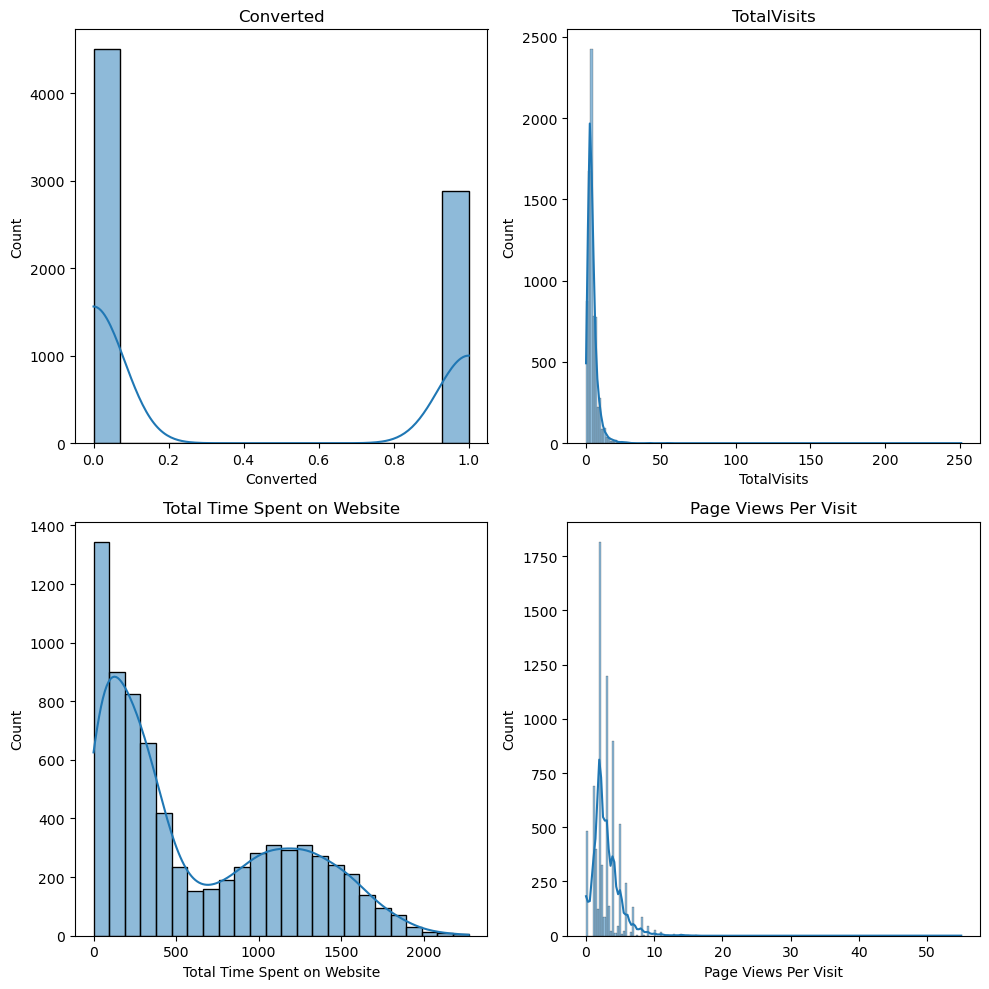

In [36]:
# Histogram scanning for numeric column to check skewness
plt.figure(figsize=(10, 10))

for i, col in enumerate(num_cols.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(num_cols[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [37]:
cat_cols = df_prep[['Lead Origin', 'Lead Source', 'Do Not Email',
              'Do Not Call', 'Last Activity', 'Country',
              'Specialization', 'What is your current occupation',
              'Search', 'Newspaper Article', 'X Education Forums',
              'Newspaper', 'Digital Advertisement', 'Through Recommendations',
              'A free copy of Mastering The Interview', 'Last Notable Activity']]

for col in cat_cols:
    print("\n====================")
    print(f"Value counts for: {col}\n")
    counts = df_prep[col].value_counts()
    perc = (df_prep[col].value_counts(normalize=True) * 100).round(2)

    print(pd.DataFrame({'count': counts, 'percent': perc}))


Value counts for: Lead Origin

                         count  percent
Lead Origin                            
Landing Page Submission   4885    66.10
API                       2130    28.82
Lead Add Form              331     4.48
Lead Import                 43     0.58
Quick Add Form               1     0.01

Value counts for: Lead Source

                  count  percent
Lead Source                     
Google             2865    38.77
Direct Traffic     2543    34.41
Organic Search     1152    15.59
Olark Chat          309     4.18
Reference           259     3.50
Referral Sites      125     1.69
Other                92     1.24
Welingak Website     45     0.61

Value counts for: Do Not Email

              count  percent
Do Not Email                
No             6732     91.1
Yes             658      8.9

Value counts for: Do Not Call

             count  percent
Do Not Call                
No            7388    99.97
Yes              2     0.03

Value counts for: Last Activity


In [38]:
# Lead Origin: drop Quick Add Form
# Drop: Do Not Call
# current occupation: combine Other, Housewife and Businessman into Other
# Drop: Search
# Drop: Newspaper Article
# Drop: X Education Forums
# Drop: Newspaper
# Drop: Digital Advertisement
# Drop: Through Recommendations
# Last Notable Activity: combine Email Bounced, Unsubscribed, Had a Phone Conversation, Email Marked Spam, Approached upfront, Resubscribed to emails,
# View in browser link Clicked, Form Submitted on Website, Email Received into Other

In [39]:
df_prep = df_prep.drop(columns = ['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums',
                                  'Newspaper', 'Digital Advertisement', 'Through Recommendations'])

In [40]:
df_prep.shape

(7390, 13)

In [41]:
df_prep = df_prep[df_prep['Lead Origin'] != 'Quick Add Form']

In [42]:
df_prep['What is your current occupation'] = df_prep['What is your current occupation'].replace(
    ['Housewife', 'Businessman'], 
    'Other'
)

In [43]:
rare_last_notable = [
    'Email Bounced',
    'Unsubscribed',
    'Had a Phone Conversation',
    'Email Marked Spam',
    'Approached upfront',
    'Resubscribed to emails',
    'View in browser link Clicked',
    'Form Submitted on Website',
    'Email Received'
]

df_prep['Last Notable Activity'] = df_prep['Last Notable Activity'].replace(rare_last_notable, 'Other')

In [44]:
cat_cols = df_prep[['Lead Origin', 'Lead Source', 'Do Not Email',
              'Last Activity', 'Country',
              'Specialization', 'What is your current occupation',
              'A free copy of Mastering The Interview', 'Last Notable Activity']]

for col in cat_cols:
    print("\n====================")
    print(f"Value counts for: {col}\n")
    counts = df_prep[col].value_counts()
    perc = (df_prep[col].value_counts(normalize=True) * 100).round(2)

    print(pd.DataFrame({'count': counts, 'percent': perc}))


Value counts for: Lead Origin

                         count  percent
Lead Origin                            
Landing Page Submission   4885    66.11
API                       2130    28.83
Lead Add Form              331     4.48
Lead Import                 43     0.58

Value counts for: Lead Source

                  count  percent
Lead Source                     
Google             2865    38.77
Direct Traffic     2543    34.42
Organic Search     1152    15.59
Olark Chat          309     4.18
Reference           259     3.51
Referral Sites      125     1.69
Other                91     1.23
Welingak Website     45     0.61

Value counts for: Do Not Email

              count  percent
Do Not Email                
No             6732    91.11
Yes             657     8.89

Value counts for: Last Activity

                           count  percent
Last Activity                            
Email Opened                2808    38.00
SMS Sent                    2245    30.38
Page Visited on

## 4B. Bivariate and Multivariate Analysis

In [46]:
# Checking multicollinearity

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Select numeric columns (excluding target)
X = df_prep.select_dtypes(include=['float64', 'int64', 'int32']).drop(columns=['Converted'])

# Add constant term
X_const = add_constant(X)

# Compute VIF
vif = pd.DataFrame()
vif["feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]

# Round to 2 decimals
vif["VIF"] = vif["VIF"].round(2)

vif

,feature,VIF
0,const,4.08
1,TotalVisits,1.21
2,Total Time Spent on Website,1.01
3,Page Views Per Visit,1.21


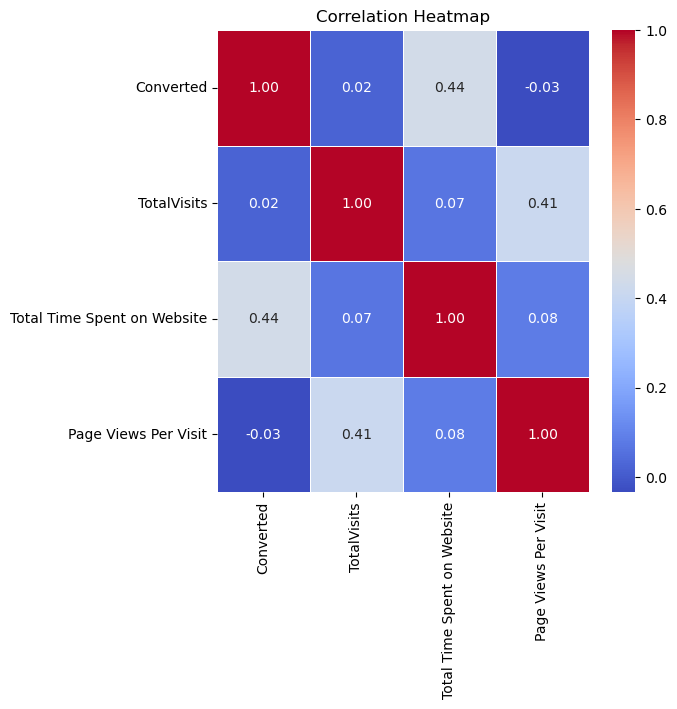

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
num_cols = df_prep.select_dtypes(include=['float64', 'int64', 'int32'])

# Compute correlation matrix
corr = num_cols.corr()

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

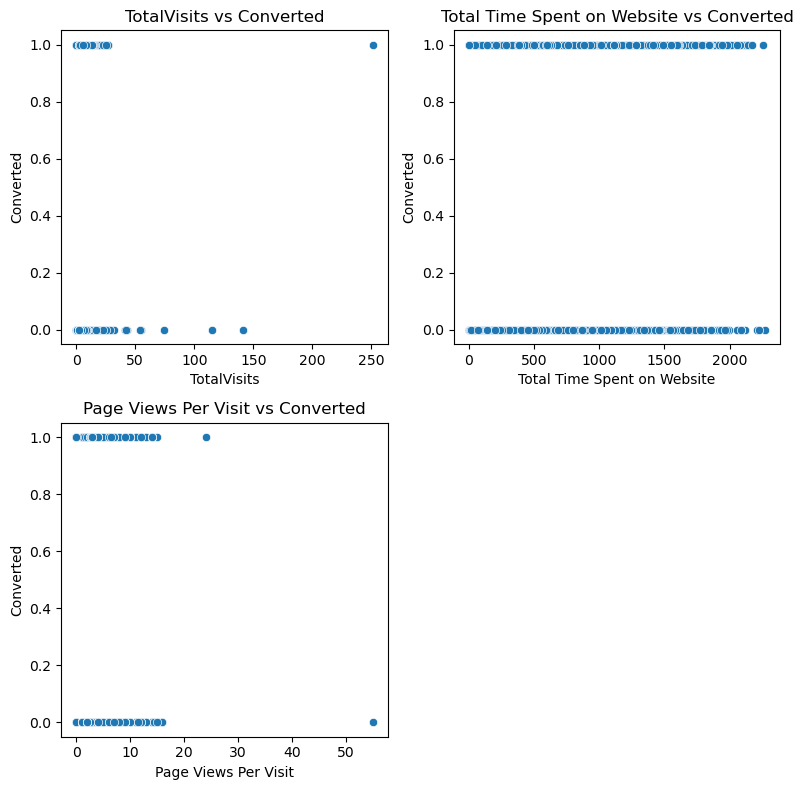

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'
]

plt.figure(figsize=(8, 8))

for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df_prep[col], y=df_prep['Converted'])
    plt.title(f"{col} vs Converted")

plt.tight_layout()
plt.show()

In [50]:
# 1. TotalVisits outliers
df_prep = df_prep[df_prep['TotalVisits'] <= 50]

# 2. Page Views Per Visit outliers
df_prep = df_prep[df_prep['Page Views Per Visit'] <= 40]

In [51]:
df_prep.shape

(7383, 13)

## 5. Feature engineering

In [53]:
df_final = df_prep.copy()

## 5A. Feature encoding

In [55]:
# 1. Do Not Email (Yes/No → 1/0)
df_final['Do Not Email'] = df_final['Do Not Email'].map({'No': 0, 'Yes': 1})

# 2. Country (India=0, Other=1)
df_final['Country'] = df_final['Country'].map({'India': 0, 'Other': 1})

# 3. A free copy of Mastering The Interview (Yes/No → 1/0)
df_final['A free copy of Mastering The Interview'] = df_final['A free copy of Mastering The Interview'].map({'No': 0, 'Yes': 1})


In [56]:
one_hot_cols = [
    'Lead Origin', 
    'Lead Source', 
    'Last Activity', 
    'Specialization', 
    'What is your current occupation',
    'Last Notable Activity'
]

df_final = pd.get_dummies(df_final, columns=one_hot_cols, drop_first=True)


In [57]:
df_final.dtypes.value_counts()

bool       49
int64       5
float64     2
Name: count, dtype: int64

In [58]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Do Not Email,7383.0,0.088446,0.283962,0.0,0.0,0.0,0.0,1.0
Converted,7383.0,0.390627,0.487924,0.0,0.0,0.0,1.0,1.0
TotalVisits,7383.0,4.171340,3.427151,0.0,2.0,3.0,5.0,43.0
Total Time Spent on Website,7383.0,609.205472,548.552424,0.0,146.0,372.0,1087.0,2272.0
Page Views Per Visit,7383.0,2.899976,1.944763,0.0,2.0,2.5,4.0,24.0
Country,7383.0,0.122308,0.327663,0.0,0.0,0.0,0.0,1.0
A free copy of Mastering The Interview,7383.0,0.390492,0.487894,0.0,0.0,0.0,1.0,1.0


## 5B. Feature Scaling

In [59]:
df_final['TotalVisits_log'] = np.log1p(df_final['TotalVisits'])
df_final['TotalTime_log'] = np.log1p(df_final['Total Time Spent on Website'])

In [60]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()

df_final[['TotalVisits_log', 'TotalTime_log', 'Page Views Per Visit']] = scaler.fit_transform(
    df_final[['TotalVisits_log', 'TotalTime_log', 'Page Views Per Visit']]
)


In [61]:
df_final = df_final.drop(columns=['TotalVisits', 'Total Time Spent on Website'])


In [62]:
from sklearn.preprocessing import StandardScaler

scaler_pv = StandardScaler()

df_final['Page Views Per Visit'] = scaler_pv.fit_transform(
    df_final[['Page Views Per Visit']]
)

In [63]:
from sklearn.preprocessing import StandardScaler

scaler_pv = StandardScaler()

df_final['Page Views Per Visit'] = scaler_pv.fit_transform(
    df_final[['Page Views Per Visit']]
)

In [64]:
df_final.head()

,Do Not Email,Converted,Page Views Per Visit,Country,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,TotalVisits_log,TotalTime_log
0,0,0,-1.491273,1,0,False,False,False,False,True,...,False,False,True,False,False,False,False,False,-2.508318,-3.210209
1,0,0,-0.205682,0,0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,0.545040,0.504659
2,0,1,-0.462800,0,1,True,False,False,False,False,...,False,True,False,False,False,False,False,False,-0.636160,0.972399
3,0,0,-0.977037,0,0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,-1.327118,0.053536
4,0,1,-0.977037,0,0,True,False,False,True,False,...,False,False,True,False,False,False,False,False,-0.636160,0.932339


## 5C. Feature Selection / Reduction

In [65]:
anova variance

from sklearn.feature_selection import f_classif
import pandas as pd

# numeric columns
num_cols = ['TotalVisits_log', 'TotalTime_log', 'Page Views Per Visit']  # adjust name if needed

# X and y
X_num = df_final[num_cols]
y = df_final['Converted']

# run ANOVA
f_values, p_values = f_classif(X_num, y)

# rounded output
anova_results = pd.DataFrame({
    'Feature': num_cols,
    'F_value': f_values.round(5),
    'p_value': p_values.round(5)
})

print(anova_results)

                Feature    F_value  p_value
0       TotalVisits_log    0.11217   0.7377
1         TotalTime_log  314.48022   0.0000
2  Page Views Per Visit    7.22635   0.0072


In [66]:
from sklearn.feature_selection import chi2
import pandas as pd

# 1. Select ONLY categorical dummy variables (bools or uint8)
cat_dummy_cols = df_final.select_dtypes(include=['bool', 'uint8']).columns

# 2. X = categorical dummy vars, y = target
X_cat = df_final[cat_dummy_cols]
y = df_final['Converted']

# 3. Run chi-square test
chi_values, p_values = chi2(X_cat, y)

# 4. Create results table
chi2_results = pd.DataFrame({
    'Feature': cat_dummy_cols,
    'Chi2': chi_values.round(5),
    'p_value': p_values.round(5)
}).sort_values('Chi2', ascending=False)

print(chi2_results)

                                              Feature       Chi2  p_value
41  What is your current occupation_Working Profes...  650.42540  0.00000
47                     Last Notable Activity_SMS Sent  512.32443  0.00000
17                             Last Activity_SMS Sent  353.32694  0.00000
1                           Lead Origin_Lead Add Form  340.12356  0.00000
7                               Lead Source_Reference  273.39378  0.00000
43                     Last Notable Activity_Modified  201.66690  0.00000
10                        Last Activity_Email Bounced  112.29174  0.00000
15                                Last Activity_Other   88.61809  0.00000
31                        Specialization_Not Provided   67.31579  0.00000
16              Last Activity_Page Visited on Website   61.17418  0.00000
9                        Lead Source_Welingak Website   60.33286  0.00000
14              Last Activity_Olark Chat Conversation   59.25122  0.00000
38              What is your current o

In [67]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# ---------------------------
# 1. Split features & target
# ---------------------------
X = df_final.drop('Converted', axis=1)
y = df_final['Converted']

# ---------------------------
# 2. Compute MI scores
# ---------------------------
mi_scores = mutual_info_regression(X, y, random_state=42)

# ---------------------------
# 3. Create DataFrame + round
# ---------------------------
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
})

# Sort and round to 5 decimals
mi_df = mi_df.sort_values(by='MI Score', ascending=False)
mi_df['MI Score'] = mi_df['MI Score'].round(5)

mi_df

,Feature,MI Score
54,TotalTime_log,0.16471
51,Last Notable Activity_SMS Sent,0.04262
45,What is your current occupation_Working Profes...,0.04157
21,Last Activity_SMS Sent,0.03181
44,What is your current occupation_Unemployed,0.02728
5,Lead Origin_Lead Add Form,0.02696
11,Lead Source_Reference,0.02187
47,Last Notable Activity_Modified,0.02183
1,Page Views Per Visit,0.02168
15,Last Activity_Email Link Clicked,0.01652


In [68]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# ---------------------------
# 1. Define X and y
# ---------------------------
X = df_final.drop('Converted', axis=1)
y = df_final['Converted']

# ---------------------------
# 2. Train Random Forest
# ---------------------------
rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)
rf.fit(X, y)

# ---------------------------
# 3. Extract & round importances
# ---------------------------
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.round(rf.feature_importances_, 5)   # rounded to 5 decimals
})

rf_importance = rf_importance.sort_values(by='Importance', ascending=False)
rf_importance

,Feature,Importance
54,TotalTime_log,0.43557
1,Page Views Per Visit,0.07069
53,TotalVisits_log,0.06907
45,What is your current occupation_Working Profes...,0.05548
51,Last Notable Activity_SMS Sent,0.04139
5,Lead Origin_Lead Add Form,0.03132
44,What is your current occupation_Unemployed,0.02491
7,Lead Source_Google,0.01488
3,A free copy of Mastering The Interview,0.01483
35,Specialization_Not Provided,0.01471


In [69]:
df_final.shape

(7383, 56)

In [70]:
cols_to_drop = [

    # ---- NUMERIC ----
    'TotalVisits_log',

    # ---- SPECIALIZATION ----
    'Specialization_Services Excellence',
    'Specialization_Retail Management',
    'Specialization_International Business',
    'Specialization_Hospitality Management',
    'Specialization_Healthcare Management',
    'Specialization_E-Business',
    'Specialization_Finance Management',
    'Specialization_IT Projects Management',
    'Specialization_Travel and Tourism',
    'Specialization_Media and Advertising',
    'Specialization_Rural and Agribusiness',

    # ---- LEAD SOURCE ----
    'Lead Source_Other',
    'Lead Source_Google',
    'Lead Source_Organic Search',
    'Lead Source_Referral Sites',
    'Lead Source_Olark Chat',

    # ---- LEAD ORIGIN ----
    'Lead Origin_Lead Import',

    # ---- LAST ACTIVITY ----
    'Last Activity_Other',
    'Last Activity_Unsubscribed',
    'Last Activity_Olark Chat Conversation',
    'Last Activity_Page Visited on Website',
    'Last Activity_Unreachable',
    'Last Activity_Email Link Clicked',

    # ---- LAST NOTABLE ACTIVITY ----
    'Last Notable Activity_Other',
    'Last Notable Activity_Page Visited on Website',
    'Last Notable Activity_Olark Chat Conversation',
    'Last Notable Activity_Unreachable',
    'Last Notable Activity_Email Opened',

    # ---- OCCUPATION ----
    'What is your current occupation_Other',
    'What is your current occupation_Student',

    # ---- COUNTRY ----
    'Country'
]

# Drop existing columns only
cols_to_drop = [col for col in cols_to_drop if col in df_final.columns]

df_final = df_final.drop(columns=cols_to_drop)

print(f"Dropped {len(cols_to_drop)} columns successfully.")


Dropped 32 columns successfully.


In [71]:
df_final.shape

(7383, 24)

In [72]:
df_final['Converted'].value_counts()

Converted
0    4499
1    2884
Name: count, dtype: int64

## 6. Modelling

In [73]:
# Logistic regression model
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    RocCurveDisplay
)

# Statsmodels (optional but recommended)
import statsmodels.api as sm

In [74]:
# train/test split
from sklearn.model_selection import train_test_split

X = df_final.drop('Converted', axis=1)
y = df_final['Converted']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [75]:
X_train.shape, X_test.shape

((5906, 23), (1477, 23))

In [76]:
y_train.value_counts(normalize=True)

Converted
0    0.60938
1    0.39062
Name: proportion, dtype: float64

In [77]:
#train the model
from sklearn.linear_model import LogisticRegression

# Create model
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)

# Train
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [78]:
# make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

In [79]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[710, 190],
       [150, 427]])

In [80]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
precision

0.6920583468395461

In [81]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

0.7400346620450606

In [82]:
f1 = f1_score(y_test, y_pred)
f1

0.7152428810720268

In [83]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

0.8395830926246869

In [84]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7698036560595802

# XGBOOST

In [85]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0.1,
    reg_lambda=1,
    scale_pos_weight=2,    # imbalance handling
    objective='binary:logistic',
    n_jobs=4,
    random_state=42,
    eval_metric='auc'
)

xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [86]:
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

In [87]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix
)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8083953960731212
Precision: 0.7168141592920354
Recall: 0.8422876949740035
F1 Score: 0.7745019920318725
ROC AUC: 0.8883217793183131

Confusion Matrix:
 [[708 192]
 [ 91 486]]


In [88]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, confusion_matrix

thresholds = np.arange(0.10, 0.70, 0.05)

print("Threshold | Precision | Recall |   TN   FP   FN   TP")
print("--------------------------------------------------------")

for t in thresholds:
    y_pred_t = (y_pred_proba >= t).astype(int)
    
    p = precision_score(y_test, y_pred_t)
    r = recall_score(y_test, y_pred_t)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()
    
    print(f"{t:8.2f} | {p:9.3f} | {r:6.3f} | {tn:4d} {fp:4d} {fn:4d} {tp:4d}")

Threshold | Precision | Recall |   TN   FP   FN   TP
--------------------------------------------------------
    0.10 |     0.465 |  0.983 |  248  652   10  567
    0.15 |     0.514 |  0.962 |  376  524   22  555
    0.20 |     0.572 |  0.946 |  491  409   31  546
    0.25 |     0.615 |  0.927 |  565  335   42  535
    0.30 |     0.641 |  0.912 |  606  294   51  526
    0.35 |     0.661 |  0.893 |  636  264   62  515
    0.40 |     0.676 |  0.880 |  657  243   69  508
    0.45 |     0.701 |  0.868 |  686  214   76  501
    0.50 |     0.717 |  0.842 |  708  192   91  486
    0.55 |     0.736 |  0.820 |  730  170  104  473
    0.60 |     0.765 |  0.794 |  759  141  119  458
    0.65 |     0.780 |  0.750 |  778  122  144  433


In [89]:
# Choose threshold 0.40
y_proba = xgb.predict_proba(X_test)[:, 1]

In [90]:
threshold = 0.40
y_pred_040 = (y_proba >= threshold).astype(int)

In [91]:
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, 
    f1_score, accuracy_score
)

print("Accuracy:", accuracy_score(y_test, y_pred_040))
print("Precision:", precision_score(y_test, y_pred_040))
print("Recall:", recall_score(y_test, y_pred_040))
print("F1 Score:", f1_score(y_test, y_pred_040))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_040))

Accuracy: 0.7887610020311442
Precision: 0.6764314247669774
Recall: 0.8804159445407279
F1 Score: 0.7650602409638554

Confusion Matrix:
 [[657 243]
 [ 69 508]]


# CATBOOST

In [92]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=400,               # 300–500 recommended
    learning_rate=0.05,           # same as XGBoost
    depth=6,                      # CatBoost performs best at 6
    l2_leaf_reg=5,                # stronger regularization
    auto_class_weights='Balanced',# handles imbalance correctly
    
    # Regularization & bagging
    random_strength=1,            # prevents overfitting
    bagging_temperature=0.5,      # stabilizes trees
    
    # Tree & split parameters
    border_count=128,             # finer splits
    grow_policy='SymmetricTree',  # default, but more stable
    
    # Runtime
    thread_count=4,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=False
)

cat_model.fit(X_train, y_train)

In [93]:
y_pred = cat_model.predict(X_test)
y_pred_proba = cat_model.predict_proba(X_test)[:, 1]

In [94]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8185511171293162
Precision: 0.7464114832535885
Recall: 0.8110918544194108
F1 Score: 0.7774086378737541
ROC AUC: 0.8842201039861353

Confusion Matrix:
 [[741 159]
 [109 468]]


In [95]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, confusion_matrix

thresholds = np.arange(0.10, 0.70, 0.05)

print("Threshold | Precision | Recall |   TN   FP   FN   TP")
print("--------------------------------------------------------")

for t in thresholds:
    y_pred_t = (y_pred_proba >= t).astype(int)
    
    p = precision_score(y_test, y_pred_t)
    r = recall_score(y_test, y_pred_t)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()
    
    print(f"{t:8.2f} | {p:9.3f} | {r:6.3f} | {tn:4d} {fp:4d} {fn:4d} {tp:4d}")

Threshold | Precision | Recall |   TN   FP   FN   TP
--------------------------------------------------------
    0.10 |     0.486 |  0.964 |  312  588   21  556
    0.15 |     0.548 |  0.950 |  448  452   29  548
    0.20 |     0.601 |  0.932 |  543  357   39  538
    0.25 |     0.628 |  0.917 |  587  313   48  529
    0.30 |     0.659 |  0.899 |  632  268   58  519
    0.35 |     0.676 |  0.880 |  657  243   69  508
    0.40 |     0.697 |  0.856 |  685  215   83  494
    0.45 |     0.729 |  0.835 |  721  179   95  482
    0.50 |     0.746 |  0.811 |  741  159  109  468
    0.55 |     0.769 |  0.789 |  763  137  122  455
    0.60 |     0.781 |  0.742 |  780  120  149  428
    0.65 |     0.797 |  0.709 |  796  104  168  409


## 7. Cross-validation and and advanced implementation

In [99]:
# Revalidating Catboost output with stratefied k folds
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

X = df_final.drop('Converted', axis=1)
y = df_final['Converted']

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

param_grid = {
    'depth': [5, 6],
    'learning_rate': [0.04, 0.05],
    'iterations': [400, 600],
    'l2_leaf_reg': [5],
    'bagging_temperature': [0.5],
    'random_strength': [1]
}

cat_model = CatBoostClassifier(
    auto_class_weights='Balanced',
    border_count=128,
    grow_policy='SymmetricTree',
    loss_function='Logloss',
    eval_metric='AUC',
    thread_count=4,
    verbose=False,
    random_state=42
)

grid = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=skf,
    n_jobs=-1
)

grid.fit(X, y)

print(f"Best roc_auc: {grid.best_score_}")
print(f"Best Params: {grid.best_params_}")

Best roc_auc: 0.888448415982035
Best Params: {'bagging_temperature': 0.5, 'depth': 5, 'iterations': 400, 'l2_leaf_reg': 5, 'learning_rate': 0.04, 'random_strength': 1}


In [100]:
# Checking for improvement in performance through stacking XGboost and Catboost

In [101]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0.1,
    reg_lambda=1,
    scale_pos_weight=2,
    objective='binary:logistic',
    eval_metric='auc',
    n_jobs=4,
    random_state=42
)

cat_model = CatBoostClassifier(
    iterations=600,
    learning_rate=0.04,
    depth=5,
    l2_leaf_reg=5,
    bagging_temperature=0.5,
    random_strength=1,
    auto_class_weights='Balanced',
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=False,
    random_state=42
)

In [102]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

X = df_final.drop('Converted', axis=1)
y = df_final['Converted']

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

stacked_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('cat', cat_model)
    ],
    final_estimator=LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        solver='lbfgs'
    ),
    cv=skf,
    stack_method='predict_proba',
    n_jobs=-1,
    passthrough=False
)

In [103]:
stacked_model.fit(X_train, y_train)

,estimators,"[('xgb', ...), ('cat', ...)]"
,final_estimator,LogisticRegre...max_iter=1000)
,cv,StratifiedKFo... shuffle=True)
,stack_method,'predict_proba'
,n_jobs,-1
,passthrough,False
,verbose,0
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None


In [104]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

# Predictions
y_pred = stacked_model.predict(X_test)
y_pred_proba = stacked_model.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8178740690589031
Precision: 0.7398753894080997
Recall: 0.8232235701906413
F1 Score: 0.7793273174733388
ROC AUC: 0.8870142499518583

Confusion Matrix:
 [[733 167]
 [102 475]]


## 8. Model Performance

In [106]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred_proba)
    }

In [110]:
xgb_metrics = evaluate_model(xgb, X_test, y_test)
cat_metrics = evaluate_model(cat_model, X_test, y_test)
stack_metrics = evaluate_model(stacked_model, X_test, y_test)

In [111]:
comparison_df = pd.DataFrame({
    "Model": ["XGBoost", "CatBoost", "Stacked (XGB + Cat)"],
    "Accuracy": [
        xgb_metrics["Accuracy"],
        cat_metrics["Accuracy"],
        stack_metrics["Accuracy"]
    ],
    "Precision": [
        xgb_metrics["Precision"],
        cat_metrics["Precision"],
        stack_metrics["Precision"]
    ],
    "Recall": [
        xgb_metrics["Recall"],
        cat_metrics["Recall"],
        stack_metrics["Recall"]
    ],
    "F1 Score": [
        xgb_metrics["F1 Score"],
        cat_metrics["F1 Score"],
        stack_metrics["F1 Score"]
    ],
    "ROC AUC": [
        xgb_metrics["ROC AUC"],
        cat_metrics["ROC AUC"],
        stack_metrics["ROC AUC"]
    ]
})

comparison_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,XGBoost,0.808395,0.716814,0.842288,0.774502,0.888322
1,CatBoost,0.820582,0.750804,0.809359,0.778982,0.883995
2,Stacked (XGB + Cat),0.817874,0.739875,0.823224,0.779327,0.887014
